# Stock Analysis and Back Testing a Stratergy

**Hypothesis:**

- Let Previous day close of 3:25 be x.
- Let Previous day open at 9:15 be y.
- Current day open at 9:15 be z.
- Let max(high) from 9:15 to 10:30 for current day be alpha.

Pre-requisite:
- x > y
- z < x
- Calculate alpha.

If prerequisite is satisified, find a tick which satisfies Buy condition.

Buy if:
- close of a tick > alpha
- close of a tick > sma50 for that tick
- close of a tick > dma50 for that day

Sell if:
- close value of any tick < sma50


**Strategy:**

Buy if:
- Previous day range is positive.
- Today is a gap down. 
- Breaks the high made upto 10.30 
- Breakout bar is above 50sma  in dtf and 5 min.

Stop loss at:
- Breakout candle low for today and if trade is carried over then 50 sma.

## Import Liabraries 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import xlsxwriter
import openpyxl
from statistics import mean

## Import Stock Data 

- The data is stock price of **Bank Nifty**.

- We have data of **Open, High, Low, Close, SMA20, SMA50, SMA100**.

- The data starts from **July 2011** and goes till **January 2022**.

- The data is present of every **5 minute** interval starting from **9:15 am** and goes upto **3:25 pm**. 

- In total there are **75 intervals** in a day.

In [2]:
nse_data = pd.read_excel("Bank Nifty data 5 min.xlsx", header = 2)

In [3]:
nse_data['Date'] = nse_data['Date'].dt.date

In [4]:
nse_data.iloc[0]["Date"]

datetime.date(2011, 7, 29)

In [5]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
0,2011-07-29,09:15:00,10820.65,10820.65,10758.40,10774.20,NaN,NaN,NaN
1,2011-07-29,09:20:00,10774.20,10812.40,10774.20,10807.95,NaN,NaN,NaN
2,2011-07-29,09:25:00,10807.95,10837.25,10804.35,10837.25,NaN,NaN,NaN
3,2011-07-29,09:30:00,10836.05,10891.45,10835.60,10884.80,NaN,NaN,NaN
4,2011-07-29,09:35:00,10884.80,10892.30,10871.85,10891.65,NaN,NaN,NaN


In [6]:
nse_data = nse_data.fillna(-1)
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
0,2011-07-29,09:15:00,10820.65,10820.65,10758.40,10774.20,-1.0,-1.0,-1.0
1,2011-07-29,09:20:00,10774.20,10812.40,10774.20,10807.95,-1.0,-1.0,-1.0
2,2011-07-29,09:25:00,10807.95,10837.25,10804.35,10837.25,-1.0,-1.0,-1.0
3,2011-07-29,09:30:00,10836.05,10891.45,10835.60,10884.80,-1.0,-1.0,-1.0
4,2011-07-29,09:35:00,10884.80,10892.30,10871.85,10891.65,-1.0,-1.0,-1.0


In [7]:
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100
192328,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218
192329,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000
192330,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188
192331,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980
192332,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356


In [8]:
nse_data.describe()

,Open,High,Low,Close,SMA20,SMA50,SMA 100
count,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000,192333.000000
mean,20697.310681,20713.934408,20679.911383,20697.032113,20694.677328,20690.957457,20684.575638
std,8219.052185,8224.819853,8212.829251,8218.886333,8220.118405,8222.057737,8225.221458
min,7772.600000,7801.950000,7766.350000,7772.600000,-1.000000,-1.000000,-1.000000
25%,12713.500000,12721.650000,12703.900000,12713.250000,12709.005000,12706.930000,12701.710396
50%,19198.800000,19214.450000,19180.700000,19197.900000,19198.837500,19194.966000,19185.750990
75%,26863.350000,26877.750000,26846.200000,26862.650000,26864.802500,26870.704000,26873.287624
max,41729.900000,41827.650000,41600.550000,41722.200000,41556.880000,41367.579000,41231.838614


In [9]:
nse_data.iloc[0]["Date"].year

2011

## Import Secondary Data

In [8]:
secondary_data = pd.read_excel("Data BN.xlsm", usecols = ["Date", "50 Dma"])

In [9]:
secondary_data['Date'] = secondary_data['Date'].dt.date

In [10]:
secondary_data.head()

,Date,50 Dma
0,2014-01-01,NaN
1,2014-01-02,NaN
2,2014-01-03,NaN
3,2014-01-06,NaN
4,2014-01-07,NaN


In [13]:
secondary_data.tail()

,Date,50 Dma
2021,2022-03-07,37225.998
2022,2022-03-08,37192.019
2023,2022-03-09,37167.170
2024,2022-03-10,37153.006
2025,2022-03-11,37143.023


In [11]:
nse_data = pd.merge(nse_data, secondary_data, on=['Date'])

In [12]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
0,2014-01-01,09:15:00,11418.90,11432.55,11388.00,11388.00,11368.1750,11362.309,11365.808911,NaN
1,2014-01-01,09:20:00,11390.75,11390.75,11361.00,11375.60,11368.6725,11362.511,11365.739604,NaN
2,2014-01-01,09:25:00,11375.60,11391.55,11373.55,11391.55,11369.8850,11363.107,11365.784158,NaN
3,2014-01-01,09:30:00,11391.55,11392.95,11381.10,11385.00,11370.8225,11363.794,11365.911386,NaN
4,2014-01-01,09:35:00,11385.00,11388.85,11377.75,11377.75,11371.5300,11364.071,11365.981188,NaN


In [13]:
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
147419,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218,36819.007
147420,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000,36819.007
147421,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188,36819.007
147422,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980,36819.007
147423,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356,36819.007


In [17]:
nse_data.sample(10)

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
65856,2017-08-28,12:50:00,24380.95,24385.70,24375.70,24376.60,24372.6125,24359.855,24325.790594,24047.353
99127,2019-06-18,10:25:00,30367.45,30379.15,30356.90,30370.15,30321.3225,30329.335,30413.736139,30200.277
71628,2017-12-18,12:35:00,25716.70,25737.05,25716.70,25732.55,25706.7925,25575.175,25513.962376,25142.574
91096,2019-01-09,09:55:00,27634.25,27640.85,27609.30,27615.55,27544.1275,27435.588,27368.715347,26466.793
124810,2020-11-03,13:20:00,25572.30,25591.50,25564.00,25564.00,25536.3675,25453.877,25079.765347,23112.820
114173,2020-04-13,14:25:00,19400.10,19446.40,19361.75,19416.25,19481.0725,19540.420,19587.368812,26007.832
118454,2020-07-06,14:55:00,22203.35,22224.55,22183.25,22218.90,22271.8700,22275.464,22141.291089,20147.276
111894,2020-02-25,12:00:00,30537.85,30562.50,30530.10,30554.30,30515.5450,30490.272,30550.008416,31393.845
83082,2018-07-30,10:50:00,27619.30,27633.65,27615.45,27627.20,27674.8450,27628.204,27591.114851,26607.367
113908,2020-04-07,11:05:00,18173.40,18220.95,18152.40,18211.20,18176.5600,17735.233,17694.558911,26697.682


In [18]:
nse_data.iloc[5000:5010]

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
5000,2014-04-07,09:50:00,12591.95,12593.05,12580.15,12581.40,12564.1550,12576.920,12558.912871,11289.266
5001,2014-04-07,09:55:00,12581.40,12585.85,12565.20,12571.90,12565.2350,12576.327,12559.021287,11289.266
5002,2014-04-07,10:00:00,12571.90,12582.35,12568.05,12570.95,12566.0375,12575.680,12559.120792,11289.266
5003,2014-04-07,10:05:00,12570.95,12578.90,12561.30,12576.25,12567.4925,12575.389,12559.247525,11289.266
5004,2014-04-07,10:10:00,12576.25,12577.05,12562.95,12565.85,12568.4625,12574.929,12559.362376,11289.266
5005,2014-04-07,10:15:00,12565.85,12567.00,12528.45,12528.45,12567.3200,12573.523,12559.054950,11289.266
5006,2014-04-07,10:20:00,12531.95,12557.60,12531.95,12552.05,12567.8100,12572.636,12558.823762,11289.266
5007,2014-04-07,10:25:00,12552.05,12552.60,12522.25,12525.25,12567.5925,12570.967,12558.376238,11289.266
5008,2014-04-07,10:30:00,12525.25,12536.45,12514.45,12536.45,12567.8175,12569.476,12558.132178,11289.266
5009,2014-04-07,10:35:00,12536.45,12538.15,12505.30,12516.55,12566.7500,12567.908,12558.038614,11289.266


In [14]:
nse_data.dropna(inplace=True)

In [15]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
3675,2014-03-12,09:15:00,11997.85,12049.25,11984.80,11998.70,12033.6700,12064.246,12090.860891,10814.169
3676,2014-03-12,09:20:00,11998.70,12031.40,11967.75,11967.75,12028.0375,12061.526,12089.981683,10814.169
3677,2014-03-12,09:25:00,11968.05,11990.40,11949.45,11968.85,12023.4075,12058.600,12089.100990,10814.169
3678,2014-03-12,09:30:00,11968.85,11968.85,11922.90,11938.55,12017.5875,12054.983,12088.296535,10814.169
3679,2014-03-12,09:35:00,11935.80,11949.80,11928.65,11949.80,12013.0550,12051.252,12087.416832,10814.169


In [21]:
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
147419,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218,36819.007
147420,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000,36819.007
147421,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188,36819.007
147422,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980,36819.007
147423,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356,36819.007


In [16]:
nse_data.reset_index(drop=True, inplace=True)

In [20]:
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma
0,2014-03-12,09:15:00,11997.85,12049.25,11984.80,11998.70,12033.6700,12064.246,12090.860891,10814.169
1,2014-03-12,09:20:00,11998.70,12031.40,11967.75,11967.75,12028.0375,12061.526,12089.981683,10814.169
2,2014-03-12,09:25:00,11968.05,11990.40,11949.45,11968.85,12023.4075,12058.600,12089.100990,10814.169
3,2014-03-12,09:30:00,11968.85,11968.85,11922.90,11938.55,12017.5875,12054.983,12088.296535,10814.169
4,2014-03-12,09:35:00,11935.80,11949.80,11928.65,11949.80,12013.0550,12051.252,12087.416832,10814.169


In [18]:
nse_data.iloc[0+74]

Date         2014-03-12
Time           15:25:00
Open           12025.05
High            12040.8
Low            12023.05
Close           12040.8
SMA20         12010.765
SMA50         12020.582
SMA 100    12025.391089
50 Dma        10814.169
Name: 74, dtype: object

In [25]:
nse_data.to_excel("Bank Nifty with 50 DMA.xlsx", index=False)

In [26]:
wb = openpyxl.Workbook()

ws = wb.active
ws.title = "Summary"

ws.column_dimensions['F'].width = 30
ws.column_dimensions['G'].width = 8
ws["A1"].value = """
This excel sheet contains output data gathered from backtesting strategy 2.
"""
wb.save('Strategy 2.xlsx')

## Execute Trade


In [27]:
def execute_trade(start_index, end_index):
    """
    End Index in not inclusive.
    
    """
    stage = "prerequsite"
    trade_number = 1
    trades = {}
    year = nse_data.iloc[start_index]["Date"].year

    index = start_index
    all_profits = []
    all_close_values = []
    
    while index < end_index:    
        if stage == "prerequsite" and index < end_index:
            if nse_data["Time"][index] == dt.time(9,15,0):
                previous_open = nse_data["Open"][index]
                index += 74 
                continue
            if nse_data["Time"][index] == dt.time(15,25,0):
                previous_close = nse_data["Close"][index]

                if previous_close > previous_open:
                    current_open = nse_data["Open"][index+1]
                    if current_open < previous_close:
                        stage = "buy"
                        previous_day = nse_data["Date"][index]
                        index += 1 
                        max_high = max(nse_data.iloc[index:index+16]["High"])
                        index += 16
                    else:
                        index += 1
                else:
                    index += 1
            else:
                if nse_data["Time"][index] != dt.time(9,15,0):
                    index += 1
                
        if stage == "buy" and index < end_index:
            if all(nse_data["Close"][index] > x for x in [max_high, nse_data["SMA50"][index],nse_data["50 Dma"][index]]):
                buy_price = nse_data["Close"][index]
                buy_date = nse_data["Date"][index]
                buy_time = nse_data["Time"][index]
                stage = "sell"
            index += 1
                
        if stage == "sell" and index < end_index:
            if nse_data["Close"][index] < nse_data["SMA50"][index]:
            #if nse_data["Time"][index] == dt.time(15,25,0):
                sell_price = nse_data["Close"][index] 
                sell_date = nse_data["Date"][index]
                sell_time = nse_data["Time"][index]
                stage = "prerequsite"
                index += 1
                current_profit = sell_price - buy_price
                all_profits.append(current_profit)
                all_close_values.extend([buy_price, sell_price])
                #print(previous_open, previous_close, previous_day, max_high, buy_price, sell_price, sell_price-buy_price, buy_date, buy_time, sell_date, sell_time)
            else:
                index += 1

    return (all_profits, trades, year, all_close_values)

## Find Parameter value:

In [28]:
def find_drawUp(profit_list):
    max_drawUp = 0
    index = 0
    while index < len(cumulative_profit):
        positive_sum = 0
        negative_sum = 0

        if cumulative_profit[index] < 0:
            while index < len(cumulative_profit) and cumulative_profit[index] < 0:
                negative_sum += cumulative_profit[index]
                index += 1
        if index < len(cumulative_profit) and cumulative_profit[index] > 0:
            while index < len(cumulative_profit) and cumulative_profit[index] > 0:
                positive_sum += cumulative_profit[index]
                index += 1
        
        if positive_sum > max_drawUp: 
            max_drawUp = positive_sum
            max_du_through = negative_sum
            drawUp_percent = round(positive_sum/(-max_du_through)*100,2) if max_du_through != 0 else "NA"
            print(max_drawUp, max_du_through, drawUp_percent)
    return max_drawUp, drawUp_percent

In [29]:
def find_drawDown(profit_list):
    max_drawDown = 0
    index = 0
    while index < len(cumulative_profit):
        positive_sum = 0
        negative_sum = 0
        
        if cumulative_profit[index] > 0:
            while index < len(cumulative_profit) and cumulative_profit[index] > 0:
                positive_sum += cumulative_profit[index]
                index += 1
        if index < len(cumulative_profit) and cumulative_profit[index] < 0:
            while index < len(cumulative_profit) and cumulative_profit[index] < 0:
                negative_sum += cumulative_profit[index]
                index += 1
                
        if negative_sum < max_drawDown: 
            max_drawDown = negative_sum
            max_dd_peak = positive_sum
            drawDown_percent = round(negative_sum/max_dd_peak*100,2) if max_dd_peak != 0 else "NA"
            print(max_drawDown, max_dd_peak, drawDown_percent)
    return max_drawDown, drawDown_percent

In [30]:
def save_output_parameters(profit_list, trades, year, all_close_values):
    win_trades = list(filter(lambda x: (x > 0), profit_list))
    loose_trades = list(filter(lambda x: (x < 0), profit_list))
    global cumulative_profit, cumulative_close_value
    cumulative_profit.extend(profit_list)
    cumulative_close_values.extend(all_close_values)
    
    try:
        ws = wb[str(year)]
    except:
        wb.create_sheet(str(year))
        ws = wb[str(year)]
        ws.title = str(year)
    ws.column_dimensions['F'].width = 30
    ws.column_dimensions['G'].width = 8
    
    avg_index_val = round(mean(all_close_values),2) if len(all_close_values) != 0 else "NA" 
    ws['f10'], ws['g10'] = "Averaeg Index Value", avg_index_val
    ws['f11'], ws['g11'] = "Total Trades", len(profit_list)
    ws['f12'], ws['g12'] = "Total Win Trades", len(win_trades)
    ws['f13'], ws['g13'] = "Total Loose Trades", len(loose_trades)
    ws['f14'], ws['g14'] = "Hit Ratio/ Trade win Ratio", float(f'{len(win_trades)/len(profit_list)*100:.2f}') if len(profit_list) != 0 else "NA"
    ws['f15'], ws['g15'] = "Day win Ratio", float(f'{len(win_trades)/len(loose_trades)*100:.2f}') if len(loose_trades) != 0 else "NA"
    ws['f16'], ws['g16'] = "Gross Profit", sum(win_trades)
    ws['f17'], ws['g17'] = "Gross Loss", sum(loose_trades)
    ws['f18'], ws['g18'] = "Net Profit", sum(win_trades)+sum(loose_trades)
    drawUp, drawUp_percentage = find_drawUp(profit_list)
    drawDown, drawDown_percentage = find_drawDown(profit_list)
    ws['f19'], ws['g19'] = "Max Draw Up", drawUp
    ws['f20'], ws['g20'] = "Max Draw Down", drawDown
    ws['f21'], ws['g21'] = "Draw UP Percentage", drawUp_percentage
    ws['f22'], ws['g22'] = "Draw Down Percentage", drawDown_percentage
    ws['f23'], ws['g23'] = "Average Trades", float(f"{ws['g18'].value/len(profit_list):.2f}")  if len(profit_list) != 0 else "NA"
    ws['f24'], ws['g24'] = "Average Winning Trade", float(f'{mean(win_trades):.2f}') if len(win_trades) != 0 else "NA"
    ws['f25'], ws['g25'] = "Average Loosing Trade", float(f'{mean(loose_trades):.2f}') if len(loose_trades) != 0 else "NA"
    ws['f26'], ws['g26'] = "Max Return/ Largest Winning Trade", max(win_trades) if len(win_trades) != 0 else "NA"
    ws['f27'], ws['g27'] = "Min Return/ Largest Loosing Trade", min(loose_trades) if len(loose_trades) != 0 else "NA"
    ws['f28'], ws['g28'] = "Risk Reward", round(ws['g26'].value/(-ws['g27'].value),2) if ws['g26'].value != "NA" and ws['g27'].value != "NA" else "NA"
    ws['f29'], ws['g29'] = "Net Profit %", round(ws['g18'].value/ws['g10'].value*100,2) if ws['g10'].value != "NA" else "NA"
    ws['f30'], ws['g30'] = "Return Per Year", ws['g18'].value
    ws['f31'], ws['g31'] = "Sharpe Ratio", "???"; 
    wb.save("Strategy 2.xlsx")

## Divide Dataset into Years

In [31]:
last_index = 0
last_year = nse_data.iloc[0]["Date"].year

year_start_index_number = [last_index]

for index in nse_data.index:
    if nse_data.iloc[index]["Date"].year > last_year:
        last_year = nse_data.iloc[index]["Date"].year
        year_start_index_number.append(index)

## Execute Trade Year on Year

In [41]:
def plot_returns(returns):
    x = range(len(returns))
    y = returns
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.title('Returns on Trades')
    plt.show()

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


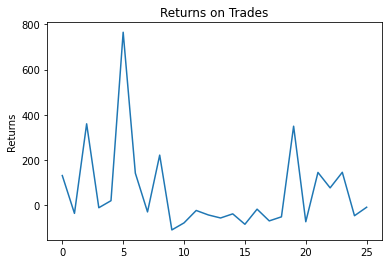

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


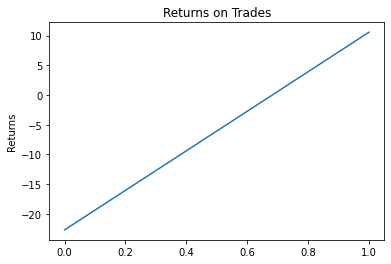

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


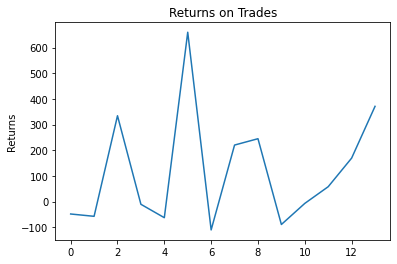

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


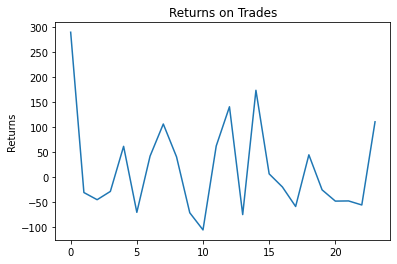

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


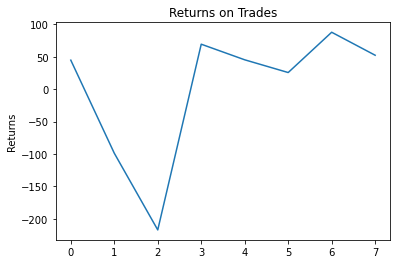

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06


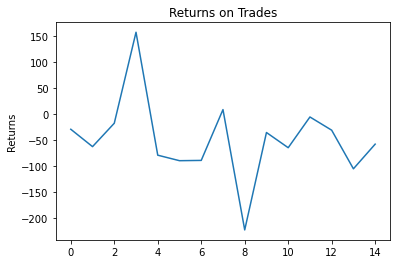

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06
-624.4499999999971 8.399999999997817 -7433.93


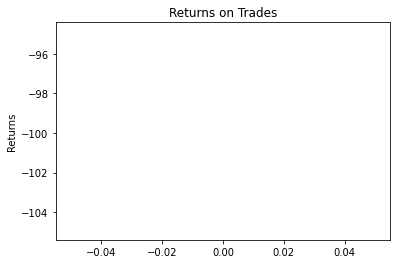

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
1435.7999999999956 -725.3999999999942 197.93
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06
-725.3999999999942 8.399999999997817 -8635.71
-1172.6500000000015 1435.7999999999956 -81.67


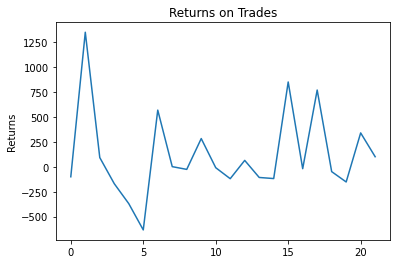

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
1435.7999999999956 -725.3999999999942 197.93
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06
-725.3999999999942 8.399999999997817 -8635.71
-1172.6500000000015 1435.7999999999956 -81.67


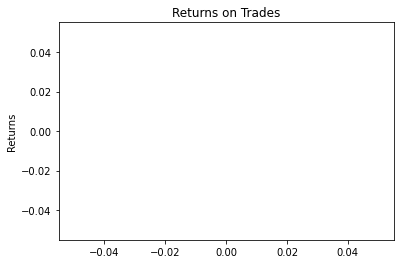

In [42]:
global cumulative_profit, cumulative_close_values
cumulative_profit = []
cumulative_close_values = []

for i in range(len(year_start_index_number)):
    start_index = year_start_index_number[i]
        if i < len(year_start_index_number)-1:
            end_index = year_start_index_number[i+1]
    profit_made, trades, year, all_close_values = execute_trade(start_index, end_index)
    save_output_parameters(profit_made, trades, year, all_close_values)
    plot_returns(profit_made)

## Find Summary of all the Years

In [34]:
len(cumulative_profit)

112

In [35]:
win_trades = list(filter(lambda x: (x > 0), cumulative_profit))
loose_trades = list(filter(lambda x: (x < 0), cumulative_profit))

ws = wb["Summary"]

avg_index_val = round(mean(cumulative_close_values),2)
ws['f10'], ws['g10'] = "Averaeg Index Value", avg_index_val
ws['f11'], ws['g11'] = "Total Trades", len(cumulative_profit)
ws['f12'], ws['g12'] = "Total Win Trades", len(win_trades)
ws['f13'], ws['g13'] = "Total Loose Trades", len(loose_trades)
ws['f14'], ws['g14'] = "Hit Ratio/ Trade win Ratio", float(f'{len(win_trades)/len(cumulative_profit)*100:.2f}') if len(cumulative_profit) != 0 else "NA"
ws['f15'], ws['g15'] = "Day win Ratio", float(f'{len(win_trades)/len(loose_trades)*100:.2f}') if len(loose_trades) != 0 else "NA"
ws['f16'], ws['g16'] = "Gross Profit", sum(win_trades)
ws['f17'], ws['g17'] = "Gross Loss", sum(loose_trades)
ws['f18'], ws['g18'] = "Net Profit", sum(win_trades)+sum(loose_trades)
drawUp, drawUp_percentage = find_drawUp(cumulative_profit)
drawDown, drawDown_percentage = find_drawDown(cumulative_profit)
ws['f19'], ws['g19'] = "Max Draw Up", drawUp
ws['f20'], ws['g20'] = "Max Draw Down", drawDown
ws['f21'], ws['g21'] = "Draw UP Percentage", drawUp_percentage
ws['f22'], ws['g22'] = "Draw Down Percentage", drawDown_percentage
ws['f23'], ws['g23'] = "Average Trades", float(f"{ws['g18'].value/len(cumulative_profit):.2f}") if len(cumulative_profit) != 0 else "NA"
ws['f24'], ws['g24'] = "Average Winning Trade", float(f'{mean(win_trades):.2f}') if len(win_trades) != 0 else "NA"
ws['f25'], ws['g25'] = "Average Loosing Trade", float(f'{mean(loose_trades):.2f}') if len(loose_trades) != 0 else "NA"
ws['f26'], ws['g26'] = "Max Return/ Largest Winning Trade", max(win_trades) if len(win_trades) != 0 else "NA"
ws['f27'], ws['g27'] = "Min Return/ Largest Loosing Trade", min(loose_trades) if len(loose_trades) != 0 else "NA"
ws['f28'], ws['g28'] = "Risk Reward", round(ws['g26'].value/(-ws['g27'].value),2) if ws['g26'].value != "NA" and ws['g27'].value != "NA" else "NA"
ws['f29'], ws['g29'] = "Net Profit %", round(ws['g18'].value/ws['g10'].value*100,2) if ws['g10'].value != "NA" else "NA"
ws['f30'], ws['g30'] = "Sharpe Ratio", "???"

wb.save("Strategy 2.xlsx")

131.79999999999927 0 NA
360.25 -35.20000000000073 1023.44
927.6500000000015 -10.299999999999272 9006.31
1435.7999999999956 -725.3999999999942 197.93
-35.20000000000073 131.79999999999927 -26.71
-561.7999999999993 222.0 -253.06
-725.3999999999942 8.399999999997817 -8635.71
-1172.6500000000015 1435.7999999999956 -81.67


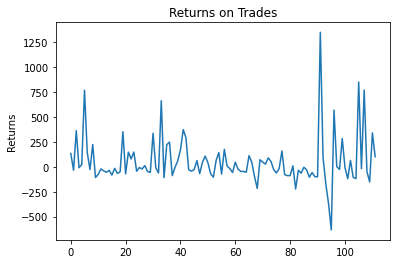

In [38]:
plot_returns(cumulative_profit)

In [41]:
nse_data["SMA20"] = nse_data["Close"].rolling(window=20).mean()
nse_data["SMA21"] = nse_data["Close"].rolling(window=21).mean()
nse_data["SMA34"] = nse_data["Close"].rolling(window=34).mean()

In [44]:
nse_data = nse_data.fillna(-1)
nse_data.head()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma,SMA21,SMA34
0,2014-03-12,09:15:00,11997.85,12049.25,11984.80,11998.70,-1.0,12064.246,12090.860891,10814.169,-1.0,-1.0
1,2014-03-12,09:20:00,11998.70,12031.40,11967.75,11967.75,-1.0,12061.526,12089.981683,10814.169,-1.0,-1.0
2,2014-03-12,09:25:00,11968.05,11990.40,11949.45,11968.85,-1.0,12058.600,12089.100990,10814.169,-1.0,-1.0
3,2014-03-12,09:30:00,11968.85,11968.85,11922.90,11938.55,-1.0,12054.983,12088.296535,10814.169,-1.0,-1.0
4,2014-03-12,09:35:00,11935.80,11949.80,11928.65,11949.80,-1.0,12051.252,12087.416832,10814.169,-1.0,-1.0


In [45]:
nse_data.tail()

,Date,Time,Open,High,Low,Close,SMA20,SMA50,SMA 100,50 Dma,SMA21,SMA34
143744,2022-01-24,15:05:00,36874.30,36946.70,36813.45,36946.70,36725.6400,36968.661,37242.978218,36819.007,36729.009524,36827.233824
143745,2022-01-24,15:10:00,36946.55,37063.65,36929.50,37038.35,36735.3350,36960.372,37237.150000,36819.007,36740.530952,36829.801471
143746,2022-01-24,15:15:00,37048.60,37073.95,36990.90,37050.30,36747.5000,36953.933,37231.681188,36819.007,36750.333333,36831.750000
143747,2022-01-24,15:20:00,37047.80,37062.85,36894.25,36905.65,36751.2025,36944.372,37223.801980,36819.007,36755.030952,36827.005882
143748,2022-01-24,15:25:00,36902.40,36945.05,36808.15,36834.90,36751.3125,36934.724,37215.664356,36819.007,36755.188095,36819.972059


In [21]:
def execute_trade_time_tick(num_ticks):
    
    stage = "prerequsite"
    index = 0
    all_profits = []
    
    while index < len(nse_data):    
        if stage == "prerequsite" and index < len(nse_data):
            if nse_data["Time"][index] == dt.time(9,15,0):
                previous_open = nse_data["Open"][index]
                index += 74 
                continue
            if nse_data["Time"][index] == dt.time(15,25,0):
                previous_close = nse_data["Close"][index]

                if previous_close > previous_open:
                    current_open = nse_data["Open"][index+1]
                    if current_open < previous_close:
                        stage = "buy"
                        previous_day = nse_data["Date"][index]
                        index += 1 
                        max_high = max(nse_data.iloc[index:index+num_ticks]["High"])
                        index += num_ticks
                    else:
                        index += 1
                else:
                    index += 1
            else:
                if nse_data["Time"][index] != dt.time(9,15,0):
                    index += 1
                
        if stage == "buy" and index < len(nse_data):
            if all(nse_data["Close"][index] > x for x in [max_high, nse_data["SMA50"][index],nse_data["50 Dma"][index]]):
                buy_price = nse_data["Close"][index]
                stage = "sell"
            index += 1
                
        if stage == "sell" and index < len(nse_data):
            if nse_data["Close"][index] < nse_data["SMA50"][index]:
                sell_price = nse_data["Close"][index] 
                stage = "prerequsite"
                index += 1
                current_profit = sell_price - buy_price
                all_profits.append(current_profit)
            else:
                index += 1

    return sum(all_profits) 

In [22]:
max_high_hyperp = {}

for max_high_tick in [4,16, 22]:
    max_high_hyperp[max_high_tick] = execute_trade_time_tick(max_high_tick)

In [30]:
max_high_till = ["9:30","10:30","11:00"]
returns = list(max_high_hyperp.values())
for index in range(len(max_high_till)):
    print(f"Return when max high considered at {max_high_till[index]}: {round(returns[index],2)}")

Return when max high considered at 9:30: 4572.45
Return when max high considered at 10:30: 4986.2
Return when max high considered at 11:00: 4668.15


In [34]:
def plot_returns_max_high(returns):
    x = ["9:30","10:30","11:00"]
    y = returns
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.title('Best time to Consider Max(High)')
    plt.show()

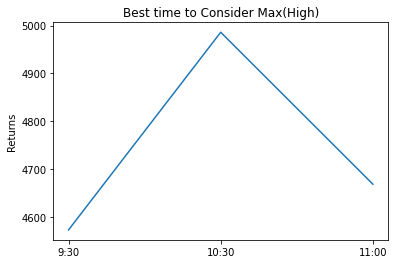

In [35]:
plot_returns_max_high(returns)

In [38]:
def execute_trade_for_sma(num_ticks, sma_value):
    
    stage = "prerequsite"
    index = 0
    all_profits = []
    sma = "SMA" + str(sma_value) 
    
    while index < len(nse_data):    
        if stage == "prerequsite" and index < len(nse_data):
            if nse_data["Time"][index] == dt.time(9,15,0):
                previous_open = nse_data["Open"][index]
                index += 74 
                continue
            if nse_data["Time"][index] == dt.time(15,25,0):
                previous_close = nse_data["Close"][index]

                if previous_close > previous_open:
                    current_open = nse_data["Open"][index+1]
                    if current_open < previous_close:
                        stage = "buy"
                        previous_day = nse_data["Date"][index]
                        index += 1 
                        max_high = max(nse_data.iloc[index:index+num_ticks]["High"])
                        index += num_ticks
                    else:
                        index += 1
                else:
                    index += 1
            else:
                if nse_data["Time"][index] != dt.time(9,15,0):
                    index += 1
                
        if stage == "buy" and index < len(nse_data):
            if all(nse_data["Close"][index] > x for x in [max_high, nse_data[sma][index],nse_data["50 Dma"][index]]):
                buy_price = nse_data["Close"][index]
                stage = "sell"
            index += 1
                
        if stage == "sell" and index < len(nse_data):
            if nse_data["Close"][index] < nse_data[sma][index]:
                sell_price = nse_data["Close"][index] 
                stage = "prerequsite"
                index += 1
                current_profit = sell_price - buy_price
                all_profits.append(current_profit)
            else:
                index += 1

    return sum(all_profits) 

In [46]:
sma_hyperparameter = {}

for sma_value in [20,21,34]:
    sma_hyperparameter[sma_value] = execute_trade_for_sma(16, sma_value)
    print(f"Completed SMA SMA{sma_value}: {sma_hyperparameter[sma_value]}")

Completed SMA SMA20: 4366.499999999987
Completed SMA SMA21: 4573.299999999974
Completed SMA SMA34: 5657.750000000015


In [48]:
def plot_sma(sma_hp):
    x = sma_hp.keys()
    y = sma_hp.values()
    plt.plot(x, y)
    # plt.xlabel('')
    plt.ylabel('Returns')
    plt.ylabel('SMA Value')
    plt.title('Finding Hyperparameter for SMA')
    plt.show()

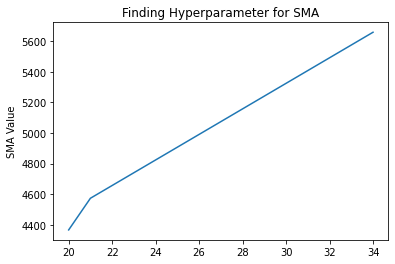

In [49]:
plot_sma(sma_hyperparameter)